In [31]:
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from sklearn import neighbors
from sklearn import metrics
from sklearn import svm
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import naive_bayes
import matplotlib.pyplot as plt

## Questão 1 

In [32]:

dataX,datay = datasets.load_boston(return_X_y=True)

In [33]:
Fold = model_selection.KFold(n_splits=5)
index_train = []
index_test = []
for iindex_train,iindex_test in Fold.split(dataX):
    index_train.append(iindex_train)
    index_test.append(iindex_test)

In [34]:
y_train = []
y_test = []
for i in range(Fold.n_splits):
    y_train.append(datay[index_train[i]])
    y_test.append(datay[index_test[i]])


In [41]:
SGD = []
LR = []
kNNR = []
NBR = []
SVMR = []
y_predSGD = []
y_predLR = []
y_predkNNR = []
y_predNBR = []
y_predSVMR = []
for i in range(Fold.n_splits):
    #Modelos
    SGD.append(linear_model.SGDRegressor(max_iter=1000))
    LR.append(linear_model.LinearRegression())
    kNNR.append(neighbors.KNeighborsRegressor(n_neighbors=4,weights='distance'))
    NBR.append(linear_model.BayesianRidge())
    SVMR.append(svm.SVR())
    
    Stand = preprocessing.StandardScaler()
    Stand.fit(dataX[index_train[i]])
    X_train_Stan = Stand.transform(dataX[index_train[i]])
    X_test_Stan = Stand.transform(dataX[index_test[i]])
    
    #X_train_Stan.append(preprocessing.scale(dataX[index_train[i]]))
    #X_test_Stan.append(preprocessing.scale(dataX[index_test[i]]))
    #y_train.append(datay[index_train[i]])
    #y_test.append(datay[index_test[i]])
    
    #fit
    SGD[i].fit(X_train_Stan,y_train[i])
    LR[i].fit(X_train_Stan,y_train[i])
    kNNR[i].fit(X_train_Stan,y_train[i])
    NBR[i].fit(X_train_Stan,y_train[i])
    SVMR[i].fit(X_train_Stan,y_train[i])
    
    #predict
    y_predSGD.append(SGD[i].predict(X_test_Stan))
    y_predLR.append(LR[i].predict(X_test_Stan))
    y_predkNNR.append(kNNR[i].predict(X_test_Stan))
    y_predNBR.append(NBR[i].predict(X_test_Stan))
    y_predSVMR.append(SVMR[i].predict(X_test_Stan))
    
    
    

Fit

In [42]:
RMSE_SGD = []
MAE_SGD = []
RMSE_LR = []
MAE_LR = []
RMSE_kNNR = []
MAE_kNNR = []
RMSE_NBR = []
MAE_NBR = []
RMSE_SVMR = []
MAE_SVMR = []

for i in range(Fold.n_splits):
    print("Split {}".format(i))
    RMSE_SGD.append(np.sqrt(metrics.mean_squared_error(y_test[i],y_predSGD[i])))
    MAE_SGD.append(metrics.mean_absolute_error(y_test[i],y_predSGD[i]))
    RMSE_LR.append(np.sqrt(metrics.mean_squared_error(y_test[i],y_predLR[i])))
    MAE_LR.append(metrics.mean_absolute_error(y_test[i],y_predLR[i]))
    RMSE_kNNR.append(np.sqrt(metrics.mean_squared_error(y_test[i],y_predkNNR[i])))
    MAE_kNNR.append(metrics.mean_absolute_error(y_test[i],y_predkNNR[i]))
    RMSE_NBR.append(np.sqrt(metrics.mean_squared_error(y_test[i],y_predNBR[i])))
    MAE_NBR.append(metrics.mean_absolute_error(y_test[i],y_predNBR[i]))
    RMSE_SVMR.append(np.sqrt(metrics.mean_squared_error(y_test[i],y_predSVMR[i])))
    MAE_SVMR.append(metrics.mean_absolute_error(y_test[i],y_predSVMR[i]))
    print("RMSE SGD:",RMSE_SGD[i])
    print("MAE SGD:",MAE_SGD[i])
    print("RMSE LR:",RMSE_LR[i])
    print("MAE LR:",MAE_LR[i])
    print("RMSE kNNR:",RMSE_kNNR[i])
    print("MAE kNNR:",MAE_kNNR[i])
    print("RMSE NBR:",RMSE_NBR[i])
    print("MAE NBR:",MAE_NBR[i])
    print("RMSE SVMR:",RMSE_SVMR[i])
    print("MAE SVMR:",MAE_SVMR[i])
    print()

print("---------------")
print("Médias")
print("RMSE SGD:",np.sum(RMSE_SGD)/Fold.n_splits)
print("MAE SGD:",np.sum(MAE_SGD)/Fold.n_splits)
print("RMSE LR:",np.sum(RMSE_LR)/Fold.n_splits)
print("MAE LR:",np.sum(MAE_LR)/Fold.n_splits)
print("RMSE kNNR:",np.sum(RMSE_kNNR)/Fold.n_splits)
print("MAE kNNR:",np.sum(MAE_kNNR)/Fold.n_splits)
print("RMSE NBR:",np.sum(RMSE_NBR)/Fold.n_splits)
print("MAE NBR:",np.sum(MAE_NBR)/Fold.n_splits)
print("RMSE SVMR:",np.sum(RMSE_SVMR)/Fold.n_splits)
print("MAE SVMR:",np.sum(MAE_SVMR)/Fold.n_splits)

Split 0
RMSE SGD: 3.5261900936825286
MAE SGD: 2.6081125413777797
RMSE LR: 3.53279637288373
MAE LR: 2.6246952382356286
RMSE kNNR: 3.9994983643325064
MAE kNNR: 3.060416501317137
RMSE NBR: 3.434298846799509
MAE NBR: 2.5441301652369455
RMSE SVMR: 2.892516790422477
MAE SVMR: 2.1697972925088655

Split 1
RMSE SGD: 5.101405033316111
MAE SGD: 3.9026421295010807
RMSE LR: 5.10844425140707
MAE LR: 3.912448174598014
RMSE kNNR: 5.972530747337931
MAE kNNR: 3.9514186838707044
RMSE NBR: 4.9909894923199705
MAE NBR: 3.7749831352612064
RMSE SVMR: 6.732002929690858
MAE SVMR: 4.182600225318992

Split 2
RMSE SGD: 5.752705170458393
MAE SGD: 4.384764471778232
RMSE LR: 5.7549939941491886
MAE LR: 4.389450681579669
RMSE kNNR: 6.011924391363891
MAE kNNR: 4.58227486426415
RMSE NBR: 5.729569950924858
MAE NBR: 4.358559018700925
RMSE SVMR: 8.765164095903746
MAE SVMR: 5.906686215347893

Split 3
RMSE SGD: 8.985505616457132
MAE SGD: 5.578646371271293
RMSE LR: 8.990720426011423
MAE LR: 5.573663772640531
RMSE kNNR: 6.64360

In [43]:
Model_final = neighbors.KNeighborsRegressor(n_neighbors=2)
dataX_stan = preprocessing.scale(dataX)
Model_final.fit(dataX_stan,datay)
y_pred = Model_final.predict(dataX_stan)
print("RMSE:",np.sqrt(metrics.mean_squared_error(datay,y_pred)))
print("MAE:",metrics.mean_absolute_error(datay,y_pred))

RMSE: 2.2044567236941432
MAE: 1.35998023715415


## Questão 2

In [44]:
 datacancerX, datacancerY = datasets.load_breast_cancer(return_X_y=True)

In [45]:
Fold = model_selection.KFold(n_splits=5)
index_train = []
index_test = []
for iindex_train,iindex_test in Fold.split(datacancerX):
    index_train.append(iindex_train)
    index_test.append(iindex_test)

In [46]:
X_train_Stan = []
y_train = []
X_test_Stan = []
y_test = []
stand = preprocessing.MinMaxScaler()
for i in range(Fold.n_splits):
    stand.fit(datacancerX[index_train[i]])
    X_train_Stan.append(stand.transform(datacancerX[index_train[i]]))
    X_test_Stan.append(stand.transform(datacancerX[index_test[i]],))
    y_train.append(datacancerY[index_train[i]])
    y_test.append(datacancerY[index_test[i]])

In [53]:
#Logistic Regression, kNN, Naive Bayes, SVM
LRC = []
kNNC = []
NBC = []
SVMC = []
y_predLRC = []
y_predkNNC = []
y_predNBC = []
y_predSVMC = []
for i in range(Fold.n_splits):
    #Modelos
    LRC.append(linear_model.LogisticRegression())
    kNNC.append(neighbors.KNeighborsClassifier(n_neighbors=3,weights='distance'))
    NBC.append(naive_bayes.GaussianNB())
    SVMC.append(svm.SVC(probability=True))
    
    #fit
    LRC[i].fit(X_train_Stan[i],y_train[i])
    kNNC[i].fit(X_train_Stan[i],y_train[i])
    NBC[i].fit(X_train_Stan[i],y_train[i])
    SVMC[i].fit(X_train_Stan[i],y_train[i])
    
    #predict
    y_predLRC.append(LRC[i].predict(X_test_Stan[i]))
    y_predkNNC.append(kNNC[i].predict(X_test_Stan[i]))
    y_predNBC.append(NBC[i].predict(X_test_Stan[i]))
    y_predSVMC.append(SVMC[i].predict(X_test_Stan[i]))
    
    
    

In [54]:
for i in range(Fold.n_splits):
    print("Split",i)
    print("LRC ",metrics.confusion_matrix(y_test[i],y_predLRC[i]))
    print()
    print("kNNC ",metrics.confusion_matrix(y_test[i],y_predkNNC[i]))
    print()
    print("NBC ",metrics.confusion_matrix(y_test[i],y_predNBC[i]))
    print()
    print("SVMC ",metrics.confusion_matrix(y_test[i],y_predSVMC[i]))
    print()

Split 0
LRC  [[58 10]
 [ 1 45]]

kNNC  [[63  5]
 [ 1 45]]

NBC  [[58 10]
 [ 4 42]]

SVMC  [[52 16]
 [ 0 46]]

Split 1
LRC  [[42  7]
 [ 0 65]]

kNNC  [[46  3]
 [ 1 64]]

NBC  [[43  6]
 [ 2 63]]

SVMC  [[40  9]
 [ 0 65]]

Split 2
LRC  [[36  4]
 [ 0 74]]

kNNC  [[36  4]
 [ 0 74]]

NBC  [[37  3]
 [ 3 71]]

SVMC  [[36  4]
 [ 0 74]]

Split 3
LRC  [[28  1]
 [ 1 84]]

kNNC  [[27  2]
 [ 0 85]]

NBC  [[27  2]
 [ 1 84]]

SVMC  [[27  2]
 [ 0 85]]

Split 4
LRC  [[26  0]
 [ 1 86]]

kNNC  [[25  1]
 [ 5 82]]

NBC  [[24  2]
 [ 7 80]]

SVMC  [[24  2]
 [ 1 86]]



In [55]:
#Accuracy, Precision, Recall, F1-Measure, AOC

ACC_LRC = []
PRE_LRC = []
REC_LRC = []
F1_LRC =  []
AUC_LRC = []

ACC_kNNC = []
PRE_kNNC = []
REC_kNNC = []
F1_kNNC =  []
AUC_kNNC = []

ACC_NBC = []
PRE_NBC = []
REC_NBC = []
F1_NBC = []
AUC_NBC = []

ACC_SVMC = []
PRE_SVMC = []
REC_SVMC = []
F1_SVMC = []
AUC_SVMC = []

for i in range(Fold.n_splits):
    print("Split {}".format(i))
    ACC_LRC.append(metrics.accuracy_score(y_test[i],y_predLRC[i]))
    PRE_LRC.append(metrics.precision_score(y_test[i],y_predLRC[i]))
    REC_LRC.append(metrics.recall_score(y_test[i],y_predLRC[i]))
    F1_LRC.append(metrics.f1_score(y_test[i],y_predLRC[i]))
    AUC_LRC.append(metrics.roc_auc_score(y_test[i],LRC[i].predict_proba(X_test_Stan[i])[:,1]))
    
    ACC_kNNC.append(metrics.accuracy_score(y_test[i],y_predkNNC[i]))
    PRE_kNNC.append(metrics.precision_score(y_test[i],y_predkNNC[i]))
    REC_kNNC.append(metrics.recall_score(y_test[i],y_predkNNC[i]))
    F1_kNNC.append(metrics.f1_score(y_test[i],y_predkNNC[i]))
    AUC_kNNC.append(metrics.roc_auc_score(y_test[i],kNNC[i].predict_proba(X_test_Stan[i])[:,1]))
    
    ACC_NBC.append(metrics.accuracy_score(y_test[i],y_predNBC[i]))
    PRE_NBC.append(metrics.precision_score(y_test[i],y_predNBC[i]))
    REC_NBC.append(metrics.recall_score(y_test[i],y_predNBC[i]))
    F1_NBC.append(metrics.f1_score(y_test[i],y_predNBC[i]))
    AUC_NBC.append(metrics.roc_auc_score(y_test[i],NBC[i].predict_proba(X_test_Stan[i])[:,1]))
    
    ACC_SVMC.append(metrics.accuracy_score(y_test[i],y_predSVMC[i]))
    PRE_SVMC.append(metrics.precision_score(y_test[i],y_predSVMC[i]))
    REC_SVMC.append(metrics.recall_score(y_test[i],y_predSVMC[i]))
    F1_SVMC.append(metrics.f1_score(y_test[i],y_predSVMC[i]))
    AUC_SVMC.append(metrics.roc_auc_score(y_test[i],SVMC[i].predict_proba(X_test_Stan[i])[:,1]))
    
    print("ACC LRC:",ACC_LRC[i])
    print("PRE LRC:",PRE_LRC[i])
    print("REC LRC:",REC_LRC[i])
    print("F1 LRC:",F1_LRC[i])
    print("AUC LRC:",AUC_LRC[i])
    print()
    print("ACC kNNC:",ACC_kNNC[i])
    print("PRE kNNC:",PRE_kNNC[i])
    print("REC kNNC:",REC_kNNC[i])
    print("F1 kNNC:",F1_kNNC[i])
    print("AUC kNNC:",AUC_kNNC[i])
    print()
    print("ACC NBC:",ACC_NBC[i])
    print("PRE NBC:",PRE_NBC[i])
    print("REC NBC:",REC_NBC[i])
    print("F1 NBC:",F1_NBC[i])
    print("AUC NBC:",AUC_NBC[i])
    print()
    print("ACC SVMC:",ACC_SVMC[i])
    print("PRE SVMC:",PRE_SVMC[i])
    print("REC SVMC:",REC_SVMC[i])
    print("F1 SVMC:",F1_SVMC[i])
    print("AUC SVMC:",AUC_SVMC[i])
    print()

print("---------------")
print("Médias")
print("ACC LRC:",np.sum(ACC_LRC)/Fold.n_splits)
print("PRE LRC:",np.sum(PRE_LRC)/Fold.n_splits)
print("REC LRC:",np.sum(REC_LRC)/Fold.n_splits)
print("F1 LRC:",np.sum(F1_LRC)/Fold.n_splits)
print("AUC LRC:",np.sum(AUC_LRC)/Fold.n_splits)
print()
print("ACC kNNC:",np.sum(ACC_kNNC)/Fold.n_splits)
print("PRE kNNC:",np.sum(PRE_kNNC)/Fold.n_splits)
print("REC kNNC:",np.sum(REC_kNNC)/Fold.n_splits)
print("F1 kNNC:",np.sum(F1_kNNC)/Fold.n_splits)
print("AUC kNNC:",np.sum(AUC_kNNC)/Fold.n_splits)
print()
print("ACC NBC:",np.sum(ACC_NBC)/Fold.n_splits)
print("PRE NBC:",np.sum(PRE_NBC)/Fold.n_splits)
print("REC NBC:",np.sum(REC_NBC)/Fold.n_splits)
print("F1 NBC:",np.sum(F1_NBC)/Fold.n_splits)
print("AUC NBC:",np.sum(AUC_NBC)/Fold.n_splits)
print()
print("ACC SVMC:",np.sum(ACC_SVMC)/Fold.n_splits)
print("PRE SVMC:",np.sum(PRE_SVMC)/Fold.n_splits)
print("REC SVMC:",np.sum(REC_SVMC)/Fold.n_splits)
print("F1 SVMC:",np.sum(F1_SVMC)/Fold.n_splits)
print("AUC SVMC:",np.sum(AUC_SVMC)/Fold.n_splits)


Split 0
ACC LRC: 0.9035087719298246
PRE LRC: 0.8181818181818182
REC LRC: 0.9782608695652174
F1 LRC: 0.8910891089108911
AUC LRC: 0.9881713554987211

ACC kNNC: 0.9473684210526315
PRE kNNC: 0.9
REC kNNC: 0.9782608695652174
F1 kNNC: 0.9375
AUC kNNC: 0.9868925831202046

ACC NBC: 0.8771929824561403
PRE NBC: 0.8076923076923077
REC NBC: 0.9130434782608695
F1 NBC: 0.8571428571428572
AUC NBC: 0.9779411764705883

ACC SVMC: 0.8596491228070176
PRE SVMC: 0.7419354838709677
REC SVMC: 1.0
F1 SVMC: 0.8518518518518519
AUC SVMC: 0.9846547314578005

Split 1
ACC LRC: 0.9385964912280702
PRE LRC: 0.9027777777777778
REC LRC: 1.0
F1 LRC: 0.9489051094890512
AUC LRC: 0.9940345368916796

ACC kNNC: 0.9649122807017544
PRE kNNC: 0.9552238805970149
REC kNNC: 0.9846153846153847
F1 kNNC: 0.9696969696969696
AUC kNNC: 0.9866562009419153

ACC NBC: 0.9298245614035088
PRE NBC: 0.9130434782608695
REC NBC: 0.9692307692307692
F1 NBC: 0.9402985074626865
AUC NBC: 0.9814756671899529

ACC SVMC: 0.9210526315789473
PRE SVMC: 0.87837

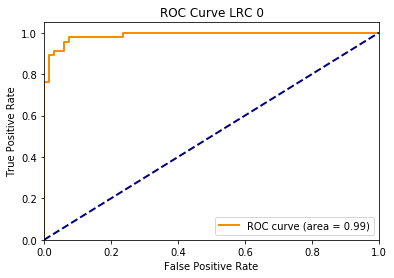

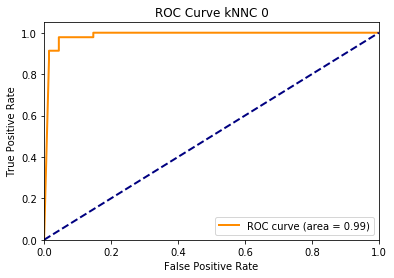

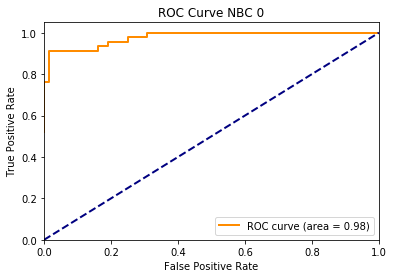

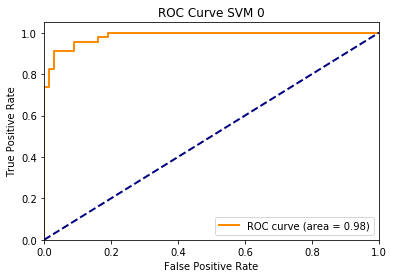

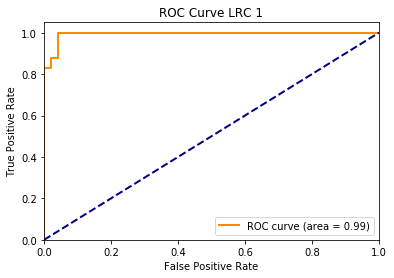

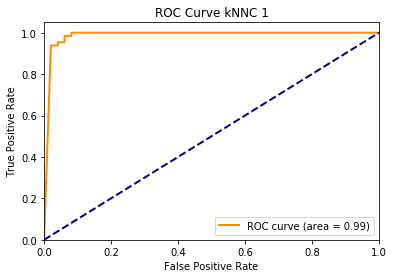

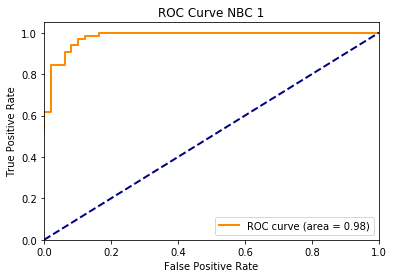

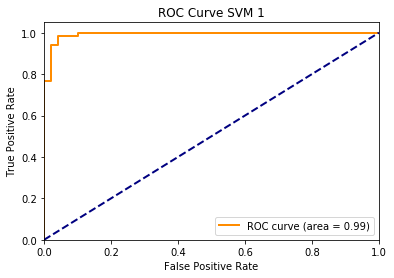

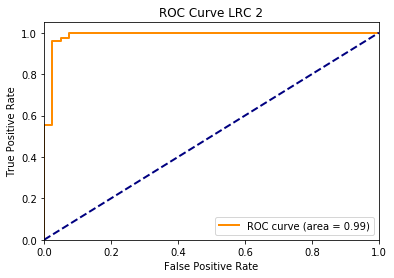

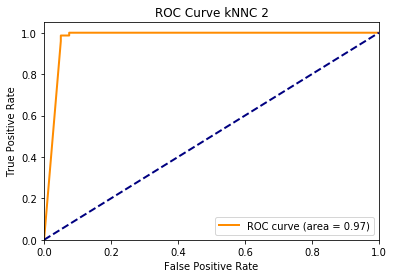

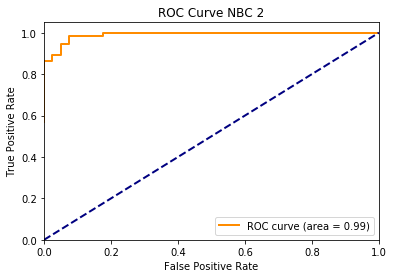

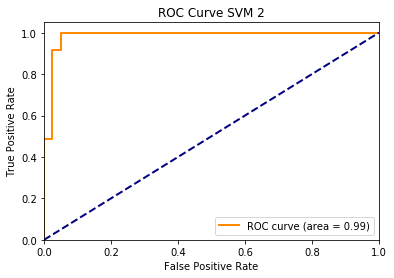

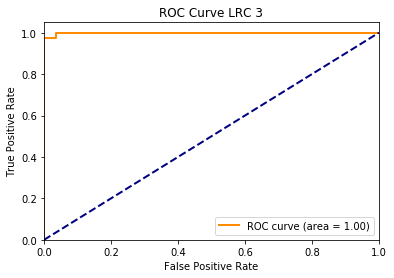

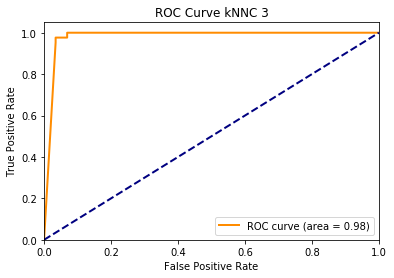

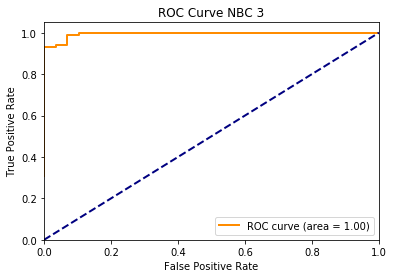

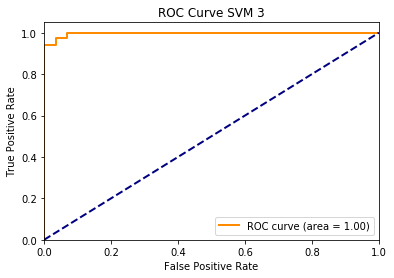

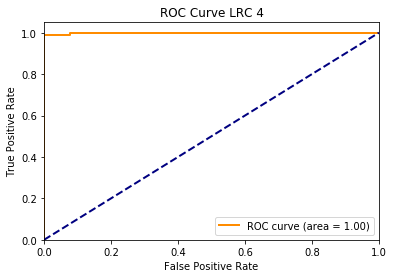

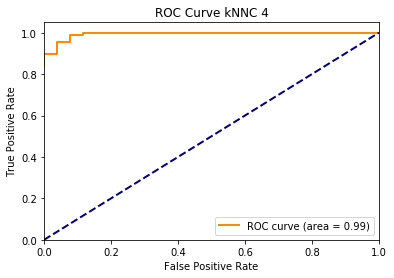

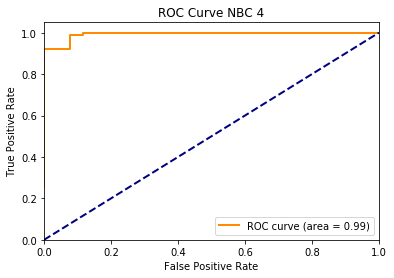

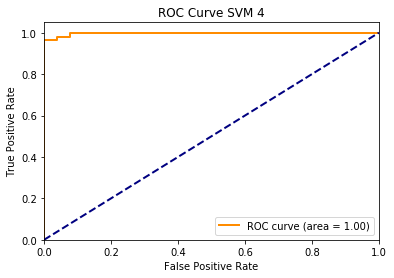

In [56]:
for i in range(Fold.n_splits):
    fpr, tpr, _ = metrics.roc_curve(y_test[i], LRC[i].predict_proba(X_test_Stan[i])[:,1])
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve LRC {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()
    # ------------------
    fpr, tpr, _ = metrics.roc_curve(y_test[i], kNNC[i].predict_proba(X_test_Stan[i])[:,1])
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve kNNC {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()
      # ------------------
    fpr, tpr, _ = metrics.roc_curve(y_test[i], NBC[i].predict_proba(X_test_Stan[i])[:,1])
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve NBC {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()
    #--------------
    fpr, tpr, _ = metrics.roc_curve(y_test[i], SVMC[i].predict_proba(X_test_Stan[i])[:,1])
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve SVM {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()

In [24]:
Model_final = neighbors.KNeighborsClassifier(n_neighbors=3,weights='distance')
X_norm = preprocessing.normalize(datacancerX,axis=0)
Model_final.fit(X_norm,datacancerY)
y_pred = Model_final.predict(X_norm)
print(metrics.accuracy_score(datacancerY,y_pred))

1.0


In [25]:
vaa = [[1,2,3],[1,2,3],[1,2,3],[1,2,3]]

In [26]:
np.sum(vaa,axis=0)

array([ 4,  8, 12])